# K-means clustering

This notebook demonstrates k-means clustering on synthetic data as well as the key-parameters and limitations for k-means clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn.datasets import make_blobs, make_moons
import os

First, generate some random, synthetic data. Sklearn provides the [datasets](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets) module for this:

In [2]:
n_samples = 1500
random_state = 1
X, y = make_blobs(n_samples=n_samples, random_state=1,  cluster_std=2, centers = [[20,20], [10,10], [20,10]])

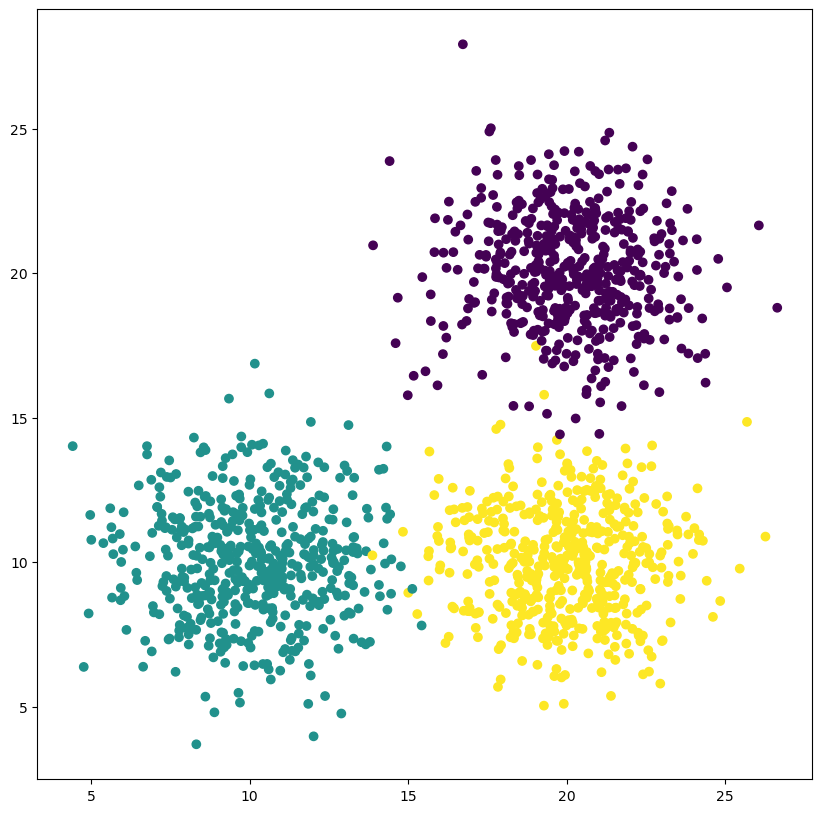

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c = y)

In order to classify every point in this image, we'll create an image large enough to cover all points in the above figure. We then retrieve all the pixel coordinates of the image

In [10]:
image = np.zeros((30, 30))
coords = np.argwhere(image==0)[:, ::-1]

Try to understand the following `for`-loop: What happens in every iteration?

In [ ]:
for i in range(1, 15, 1):
    clusterer = cluster.KMeans(n_clusters=3, random_state=1, max_iter=i, n_init=1, init='random')
    y_pred = clusterer.fit_predict(X)
    
    LUT = np.array([1,0,2])  # permutate perdicted labels
    y_pred_background = clusterer.predict(coords)
    
    fig, ax = plt.subplots()
    handle=ax.imshow(y_pred_background.reshape(30,-1))
    ax.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolor='black')
    ax.scatter(clusterer.cluster_centers_[:,0], clusterer.cluster_centers_[:,1], color='white', marker='x', s=200, label='Cluster center i')
    ax.set_title(f'Iteration #{i}')
    
    ax.legend()
    fig.tight_layout()
    fig.savefig(os.path.join(os.getcwd(), 'images', 'clusters' 'kmeans_process_{:02d}.png'.format(i)))

## Incorrect cluster numbers

The number of clusters is one of the key parameters for k-means clustering - it is both unknown in some situations yet crucial to the success of the clustering. Consider the following example. We can clearly see that two clusters do not accurately capture the structure in our data.

In [ ]:
clusterer = cluster.KMeans(n_clusters=2)
y_pred = clusterer.fit_predict(X)
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:,1], c=y_pred)

## Complex cluster shapes

Another limitation is given by the fact that assignment to a cluster is decided through the distance of a point to the center of a cluster. However, the center of a cluster may still be far away from points in the cluster!

In [25]:
noisy_moons, y = make_moons(n_samples=n_samples, noise=0.05)

In [30]:
clusterer = cluster.KMeans(n_clusters=2)
y_pred = clusterer.fit_predict(noisy_moons)

C:\Users\johamuel\Anaconda3\envs\stress\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


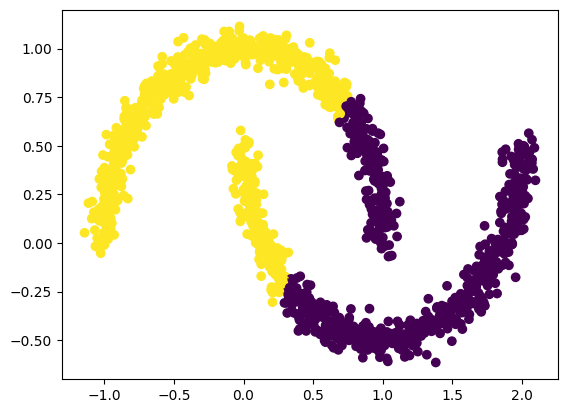

In [32]:
fig, ax = plt.subplots()
ax.scatter(noisy_moons[:, 0], noisy_moons[:,1], c=y_pred)
fig.savefig('kmeans_on_moons.png')

## Exercise 1:

Try k-means on two more datasets out of the `sklearn.datasets` module and plot the clustering results.

## Exercise 2:

Try k-means on any of the notebooks from the previous part on dimensionality reduction:

- [MNIST numbers dataset & UMAP]('../05_dimensionality_reduction/01_UMAP.ipynb)
- [Penguins dataset & UMAP]('../05_dimensionality_reduction/02_UMAP.ipynb)
- [Penguins dataset & PCA]('../05_dimensionality_reduction/03_PCA.ipynb)